In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv('titanic.csv')

In [19]:
df.head()

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [20]:
df.columns

Index(['pclass', 'survived', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [21]:
df[df.columns[0]].unique()

array([1, 2, 3], dtype=int64)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   gender     1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [23]:
df['age'].isnull() # get the exact rows later

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305     True
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

In [24]:
df['age'].isnull().sum() # get the exact rows later

263

<Axes: xlabel='survived', ylabel='count'>

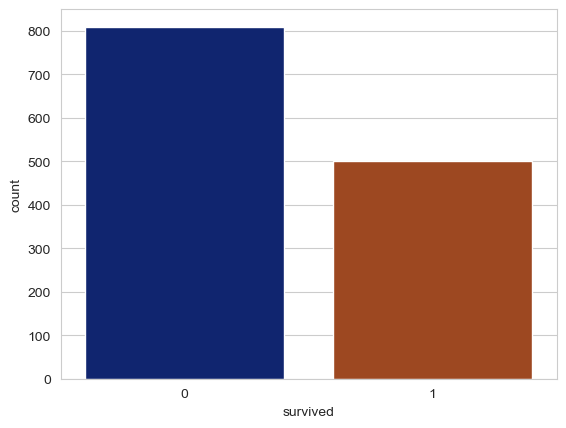

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='survived', data=df, palette='dark')

<Axes: xlabel='survived', ylabel='count'>

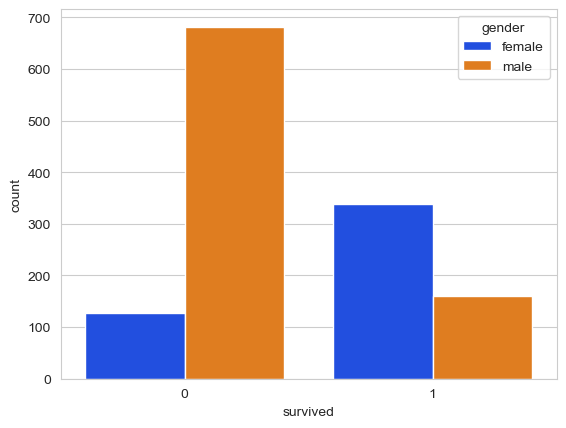

In [26]:
sns.countplot(x='survived', hue='gender', data=df, palette='bright')

<Axes: xlabel='survived', ylabel='count'>

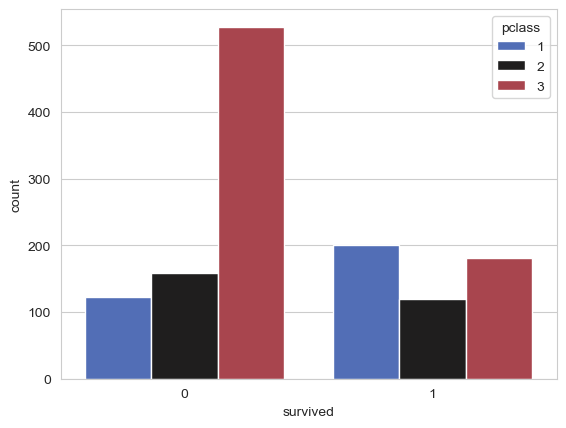

In [28]:
sns.countplot(x='survived', hue='pclass', data=df, palette='icefire')

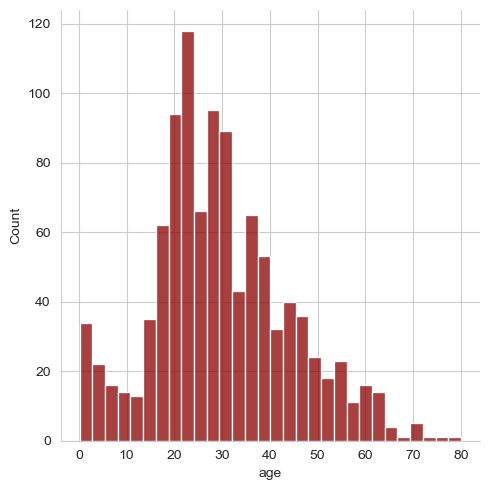

In [29]:
sns.displot(df['age'].dropna(), kde=False,color='darkred', bins=30)

<Axes: xlabel='sibsp', ylabel='count'>

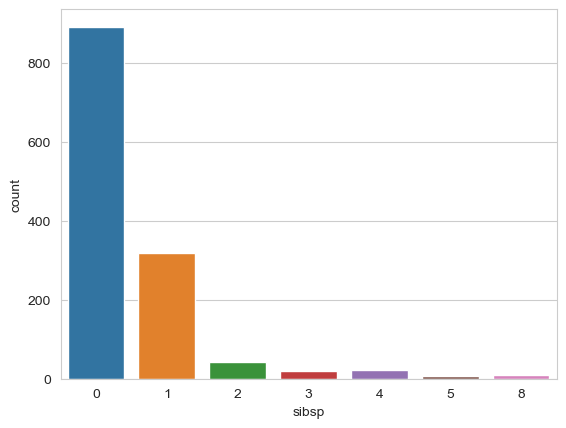

In [30]:
sns.countplot(x='sibsp', data=df)

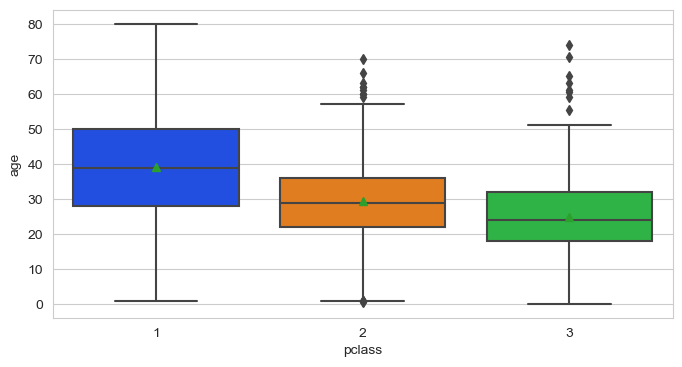

In [31]:
plt.figure(figsize=(8,4))
boxplot = sns.boxplot(x='pclass', y='age', data=df, palette='bright', showmeans=True)

In [32]:
#help(boxplot)

In [37]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 39
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

<Axes: >

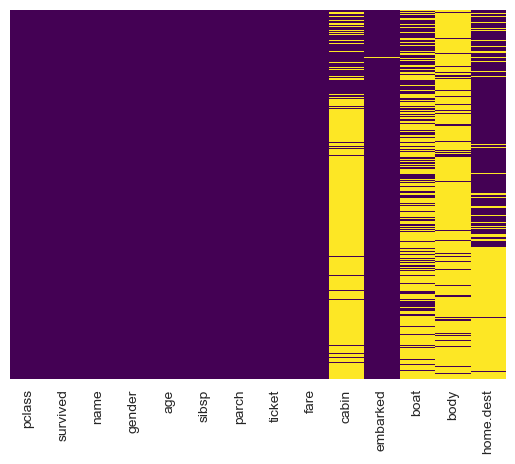

In [38]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [39]:
df['age'] = df[['age', 'pclass']].apply(impute_age, axis=1)

In [40]:
df.columns

Index(['pclass', 'survived', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

<Axes: >

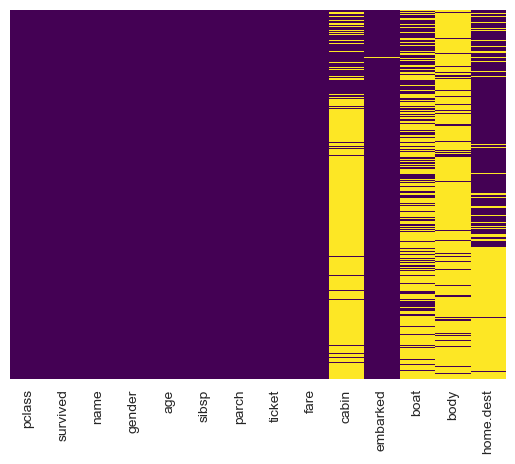

In [45]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [46]:
df.head()

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [47]:
gender = pd.get_dummies(df['gender'], drop_first=True).astype(int)
embarked = pd.get_dummies(df['embarked'], drop_first=True).astype(int)

In [48]:
gender

,male
0,0
1,1
2,0
3,1
4,0
...,...
1304,0
1305,0
1306,1
1307,1


In [49]:
df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [50]:
embarked

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1304,0,0
1305,0,0
1306,0,0
1307,0,0


In [51]:
df.columns

Index(['pclass', 'survived', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [52]:
df.drop(['name', 'gender', 'ticket', 'fare', 'cabin', 'boat', 'body', 'home.dest'], inplace = True, axis=1)

In [53]:
df.head()

,pclass,survived,age,sibsp,parch,embarked
0,1,1,29.0000,0,0,S
1,1,1,0.9167,1,2,S
2,1,0,2.0000,1,2,S
3,1,0,30.0000,1,2,S
4,1,0,25.0000,1,2,S


In [54]:
df.drop(['embarked'], inplace = True, axis=1)

In [55]:
df = pd.concat([df, gender, embarked], axis=1)

In [56]:
df.head()

,pclass,survived,age,sibsp,parch,male,Q,S
0,1,1,29.0000,0,0,0,0,1
1,1,1,0.9167,1,2,1,0,1
2,1,0,2.0000,1,2,0,0,1
3,1,0,30.0000,1,2,1,0,1
4,1,0,25.0000,1,2,0,0,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   male      1309 non-null   int32  
 6   Q         1309 non-null   int32  
 7   S         1309 non-null   int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 66.6 KB


In [58]:
df.dropna(inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   male      1309 non-null   int32  
 6   Q         1309 non-null   int32  
 7   S         1309 non-null   int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 66.6 KB
